In [ ]:
"""K-NEAREST NEIGHBOURS"""

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Load Dataset
df = pd.read_csv('zoo1.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


C:\Users\HP\AppData\Local\Temp\ipykernel_11260\2105003194.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set3')


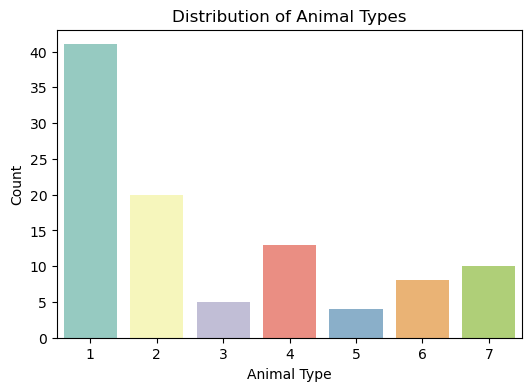

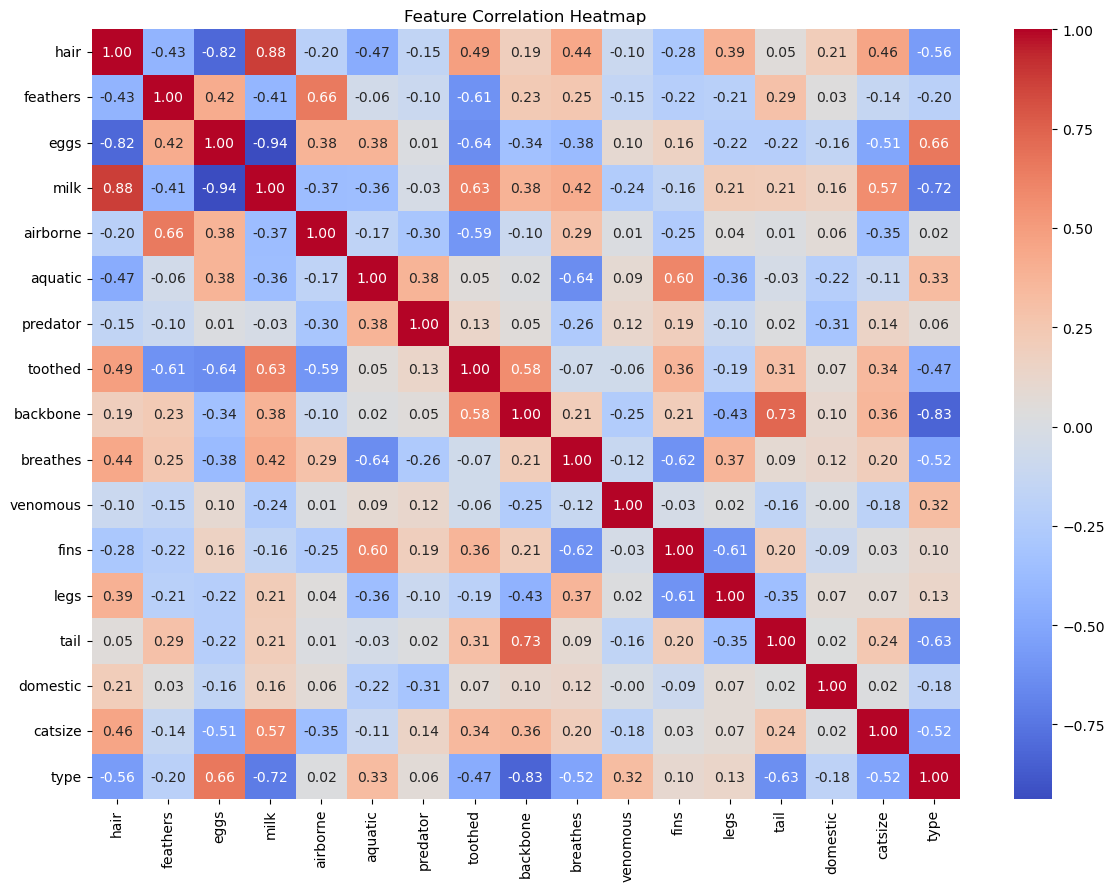

In [3]:
#  1. Analyze the data using visualizations 

# Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, palette='Set3')
plt.title("Distribution of Animal Types")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.drop(columns=["animal name"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
"""Visualization Summary
Class Distribution:

The dataset has multiple animal types labeled from 1 to 7.

Some classes are more frequent than others, indicating slight class imbalance.

Correlation Heatmap:

Strong correlations observed:

milk and hair (mammals),

eggs and feathers (birds),

fins and aquatic.

Features are mostly binary and relatively independent."""



In [5]:
#  2. Preprocess the data 

# Check missing values
print("Missing values:", df.isnull().sum())


Missing values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [7]:
# Outlier check - unique leg values
print("Unique values in 'legs' column:", df['legs'].unique())



Unique values in 'legs' column: [4 0 2 6 8 5]


<Figure size 1400x1000 with 0 Axes>

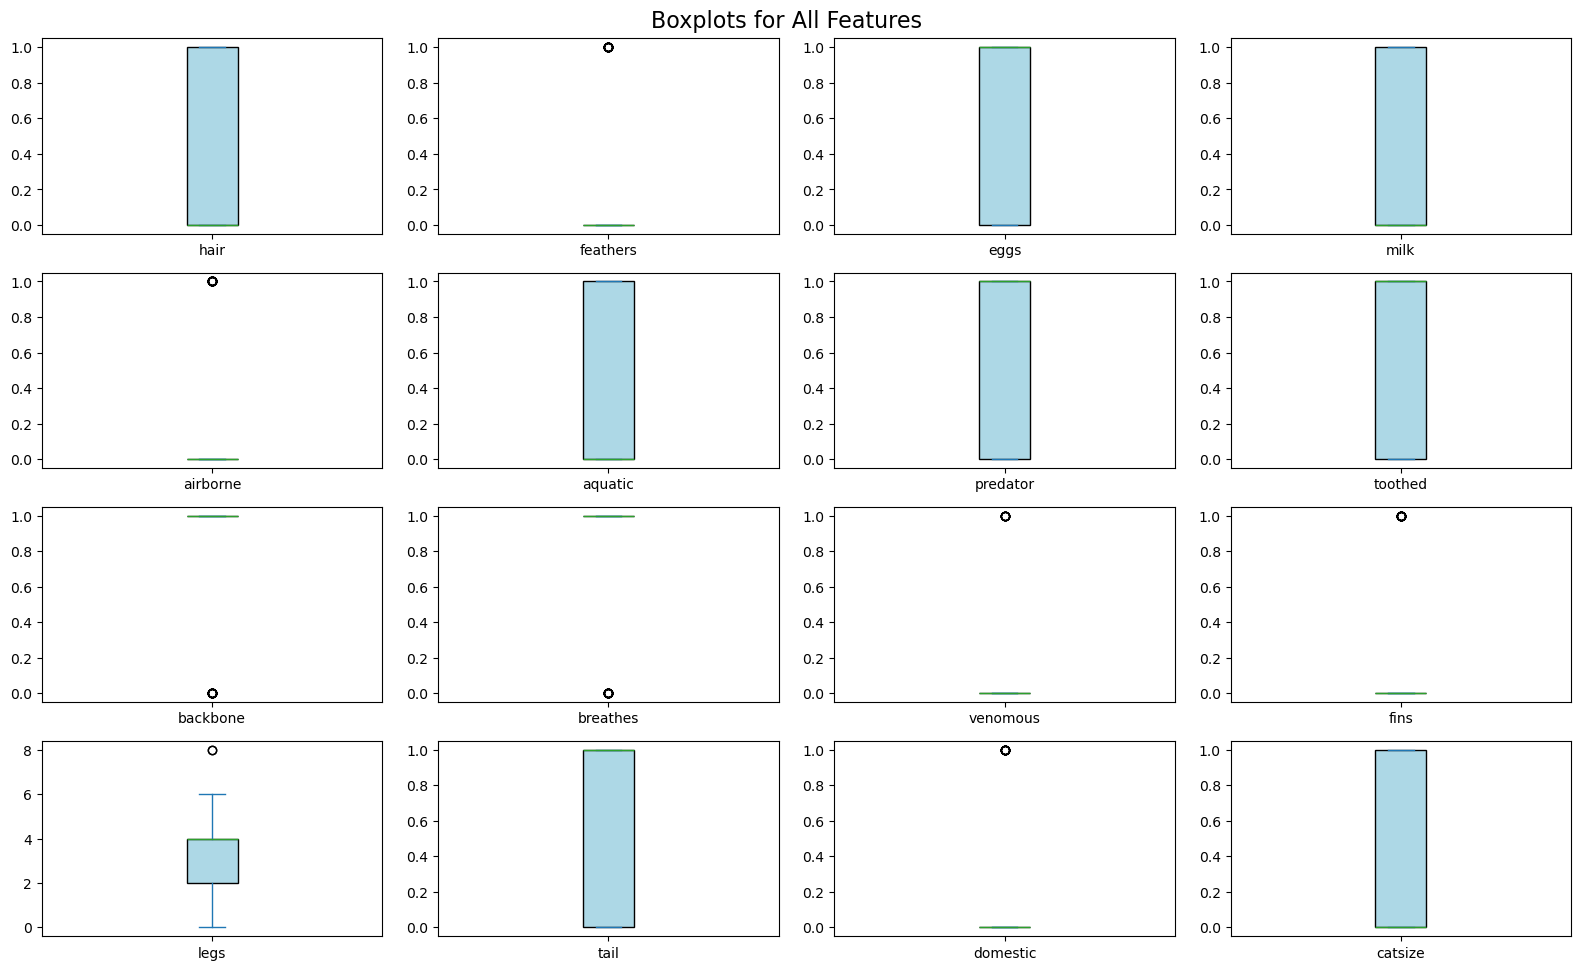

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric and target column
df_box = df.drop(columns=["animal name", "type"])

# Plot boxplots for each feature
plt.figure(figsize=(14, 10))
df_box.plot(kind='box', subplots=True, layout=(5, 4), figsize=(16, 12), patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.suptitle('Boxplots for All Features', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
"""Preprocess the data (Missing values & Outliers)
Now we’ll check for:

Missing values

Outliers in numeric fields (like legs) 

 Preprocessing Summary
 No missing values in the dataset.
'legs' column has values: [0, 2, 4, 5, 6, 8]. Values like 5, 6, and 8 may be outliers biologically, but since this is real animal data, we retain them."""

In [11]:
# Drop 'animal name'
df_cleaned = df.drop(columns=["animal name"])
df_cleaned

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [13]:
# Features and target
X = df_cleaned.drop(columns=["type"])
y = df_cleaned["type"]


In [15]:
#  3. Train-test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
# 4. Implement KNN 
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [21]:
# 5. Prediction & Evaluation 
y_pred = knn.predict(X_test)
y_pred

array([5, 2, 4, 2, 1, 1, 4, 6, 1, 4, 7, 1, 1, 7, 1, 2, 4, 6, 1, 1, 2],
      dtype=int64)

In [23]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Classification Report:", classification_report(y_test, y_pred))

Accuracy: 0.9523809523809523
Precision: 0.8214285714285714
Recall: 0.8571428571428571
F1 Score: 0.8367346938775511

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.82      0.86      0.84        21
weighted avg       0.92      0.95      0.93        21



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\m

In [ ]:
""" Model Evaluation Summary
Overall Performance:
Accuracy: 95.24% — Excellent overall performance; 20 out of 21 test samples were classified correctly.

Precision (Macro Avg): 82.14% — Indicates good average precision across all classes.

Recall (Macro Avg): 85.71% — Model is able to correctly identify most samples from each class.

F1 Score (Macro Avg): 83.67% — Balanced performance between precision and recall.

 Per-Class Insights (from Classification Report):
Class	Precision	Recall	F1-Score	Support	    Notes
1	    1.00	    1.00	1.00	     8	        Perfect classification
2	    1.00	    1.00	1.00	     4	        Perfect classification
3	    0.00	    0.00	0.00	     1	        Misclassified completely
4	    0.75	    1.00	0.86	     3       	Good recall, slightly lower precision
5	    1.00	    1.00	1.00	     1       	Perfect classification
6	    1.00	    1.00	1.00	     2      	Perfect classification
7	    1.00	    1.00	1.00	     2       	Perfect classification

 Key Observations:
The model performs perfectly on most classes (1, 2, 5, 6, 7).

Class 3 is misclassified entirely. This may be due to:

Only 1 sample in test set → hard to learn a distinct pattern.

Possible feature overlap with other classes.

Despite this, the overall model performance is excellent, especially with such a small dataset."""

In [25]:
#  6. Visualize Decision Boundaries (using PCA 2D projection) 
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)
X_test_2D = pca.transform(X_test)


In [27]:
# Train KNN on 2D reduced data
knn_2D = KNeighborsClassifier(n_neighbors=5)
knn_2D.fit(X_train_2D, y_train)

KNeighborsClassifier()

In [29]:
# Meshgrid for decision surface
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


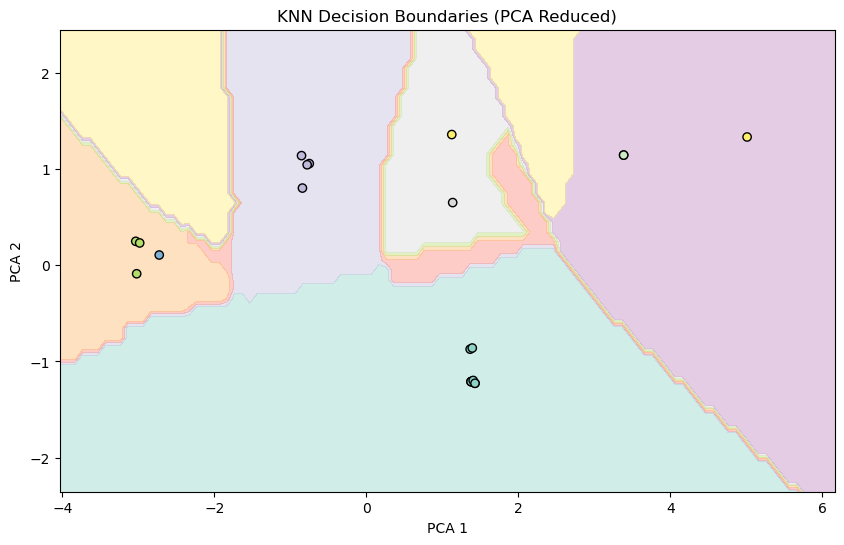

In [31]:
# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='Set3')
plt.scatter(X_test_2D[:, 0], X_test_2D[:, 1], c=y_test, edgecolor='k', cmap='Set3')
plt.title('KNN Decision Boundaries (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [ ]:
"""For real decision boundary visualization, PCA is used to reduce the data to 2D."""



In [ ]:
"""1. What are the key hyperparameters in KNN?
The main hyperparameters that significantly affect KNN performance are:
| Hyperparameter                        | Description                                                                                                                                                                                         |
| ------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `n_neighbors` (K)                     | Number of nearest neighbors to consider when making predictions. a) Too low (e.g., 1): can lead to overfitting. b) Too high (e.g., >20): can oversmooth and cause underfitting.                     |
| `weights`                             | Determines how each neighbor contributes to the decision. Options: a) 'uniform' (default) =all neighbors have equal weight. b) 'distance' =closer neighbors get higher influence.                   |
| `metric`                              | The distance function used to find nearest neighbors. Common: 'euclidean', 'manhattan', 'minkowski', etc.                                                                                           |
| `p` (only for Minkowski distance)     | Defines the type of Minkowski distance: a) p=1 → Manhattan distance b) `p=2` → Euclidean distance                                                                                                   |

2. What distance metrics can be used in KNN?
KNN relies on distance metrics to identify the closest neighbors. Some commonly used metrics include:
| Metric                 | Description                                                                        |
| ---------------------- | ---------------------------------------------------------------------------------- | 
| Euclidean Distance     | Straight-line distance between two points.                                         | 
| Manhattan Distance     | Sum of absolute differences. Good for high-dimensional sparse data.                | 
| Minkowski Distance     | Generalized distance: `p=1` → Manhattan, `p=2` → Euclidean.                        |
| Chebyshev Distance     | Maximum absolute difference between components.                                    | 
| Cosine Similarity      | Measures angle between vectors (not distance) → useful for text or recommendation. | """
